In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy.stats as sts
import matplotlib as mpl
from datetime import datetime

In [3]:
ride_data_file_path = os.path.join("Resources", "ride_data.csv")

In [4]:
ride_data_df = pd.read_csv(ride_data_file_path)
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [5]:
city_data_file_path = os.path.join("Resources","city_data.csv")

In [6]:
city_data_df = pd.read_csv(city_data_file_path)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [7]:
driver_count_city = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [9]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
#cleaning data
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [11]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
#cleaning data
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
#cleaning data 
ride_data_df.isna()

,city,date,fare,ride_id
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2370,False,False,False,False
2371,False,False,False,False
2372,False,False,False,False
2373,False,False,False,False


In [15]:
#cleaning data
ride_data_df.loc[ride_data_df["city"] == "?"]

,city,date,fare,ride_id


In [16]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [17]:
ride_data_df['city'].unique()

array(['Lake Jonathanshire', 'South Michelleport', 'Port Samanthamouth',
       'Rodneyfort', 'South Jack', 'South Latoya', 'New Paulville',
       'Simpsonburgh', 'South Karenland', 'North Jasmine',
       'New Kimberlyborough', 'West Angela', 'Roberthaven', 'North Jason',
       'Williamsview', 'Leahton', 'West Anthony', 'New Paulton',
       'West Patrickchester', 'Deanville', 'West Josephberg',
       'West Samuelburgh', 'West Heidi', 'Loganberg', 'Huntermouth',
       'Grahamburgh', 'Port Frank', 'East Kaylahaven', 'West Robert',
       'North Markport', 'Richardfort', 'Reynoldsfurt', 'Justinberg',
       'Martinezhaven', 'Jerryton', 'Lake Scottton', 'South Evanton',
       'Rogerston', 'West Ericstad', 'Hurleymouth', 'Joneschester',
       'Port Angela', 'Barajasview', 'West Christopherberg',
       'New Jacobville', 'Port David', 'Valentineton', 'Carriemouth',
       'Williamsstad', 'Royland', 'Karenberg', 'Christopherfurt',
       'Liumouth', 'Johnton', 'Erikaland', 'Raymondhav

In [18]:
sum(city_data_df["type"] == "Urban")

66

In [19]:
sum(city_data_df["type"] == "Suburban" )

36

In [20]:
sum(city_data_df["type"] == "Rural")

18

In [21]:
ride_city_df = pd.merge(ride_data_df, city_data_df, how="left", on = ["city", "city"])

In [22]:
ride_city_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [23]:
pyber_data_df = ride_city_df

In [24]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [25]:
#saving data frame as new csv file just in case to quick verify the data
pyber_data_df.to_csv(r'Resources\Combined_df_TO.csv')

In [26]:
#This is fast method of getting all averages based on city, avg fare and number of drivers
#but this does not divide into the type of the city
number_rides_per_city = pyber_data_df.groupby(["city"]).count()["ride_id"]
number_rides_per_city

city
Amandaburgh         18
Barajasview         22
Barronchester       16
Bethanyland         18
Bradshawfurt        10
                    ..
West Robert         31
West Samuelburgh    25
Williamsonville     14
Williamsstad        23
Williamsview        20
Name: ride_id, Length: 120, dtype: int64

In [27]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban" ]
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [28]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [29]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"] 
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [30]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [31]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [32]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [33]:
rural_city_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_city_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [34]:
urban_city_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_city_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [35]:
suburban_city_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_city_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [36]:
urban_avg_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_avg_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [37]:
rural_avg_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [38]:
suburban_avg_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

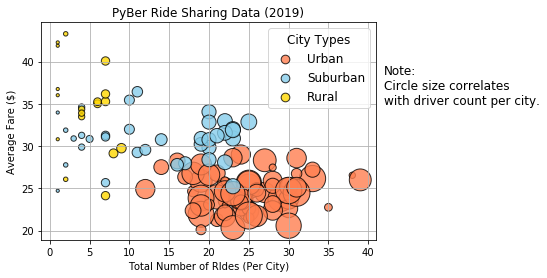

In [39]:
plt.scatter(urban_ride_count, urban_city_avg_fare, s = 10* urban_avg_driver_count, c="coral",
    edgecolor="black", linewidths=1,alpha=0.8, label="Urban")
plt.scatter(suburban_avg_driver_count, suburban_city_avg_fare, s = 10* suburban_avg_driver_count, c="skyblue",
    edgecolor="black", linewidths=1,alpha=0.8, label="Suburban")
plt.scatter(rural_avg_driver_count, rural_city_avg_fare, s = 10* rural_avg_driver_count, c="gold",
    edgecolor="black", linewidths=1,alpha=0.8, label="Rural")

plt.xlabel("Total Number of RIdes (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride Sharing Data (2019)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#note
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

plt.savefig("analysis\Fig1.png") # we save figute always before plt.show()
plt.show()


In [40]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [41]:
suburban_cities_df.describe()


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [42]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [43]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [44]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [45]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [46]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [47]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [48]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [49]:
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [50]:
mean_urban_fares = np.mean(urban_fares)
mean_suburban_fares = np.mean(suburban_fares)
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for city trips is: \n urban: ${mean_urban_fares:.2f}, \n suburban: ${mean_urban_fares:.2f}, \n rural: ${mean_rural_fares:.2f}.")
print(" ")

median_urban_fares = np.median(urban_fares)
median_suburban_fares = np.median(suburban_fares)
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for city trips is:  \n urban: ${median_urban_fares:.2f}, \n suburban: ${median_urban_fares:.2f}, \n rural: ${median_rural_fares:.2f}.")

print("")

mode_urban_fares = sts.mode(urban_fares)
mode_suburban_fares = sts.mode(suburban_fares)
mode_rural_fares = sts.mode(rural_fares)
print(f"The median fare price for city trips is:  \n urban: ${mode_urban_fares}, \n suburban: ${mode_suburban_fares}, \n rural: ${mode_rural_fares}.")


The mean fare price for city trips is: 
 urban: $24.53, 
 suburban: $24.53, 
 rural: $34.62.
 
The median fare price for city trips is:  
 urban: $24.64, 
 suburban: $24.64, 
 rural: $37.05.

The median fare price for city trips is:  
 urban: $ModeResult(mode=array([22.86]), count=array([5])), 
 suburban: $ModeResult(mode=array([17.99]), count=array([3])), 
 rural: $ModeResult(mode=array([37.05]), count=array([2])).


In [51]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [52]:
mean_urban_drivers = np.mean(urban_drivers)
mean_suburban_drivers = np.mean(suburban_drivers)
mean_rural_drivers = np.mean(rural_drivers)
mean_suburban_drivers

13.712

In [53]:
mode_urban_drivers = sts.mode(urban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

In [54]:
median_urban_drivers = np.median(urban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
median_rural_drivers = np.median(rural_drivers)

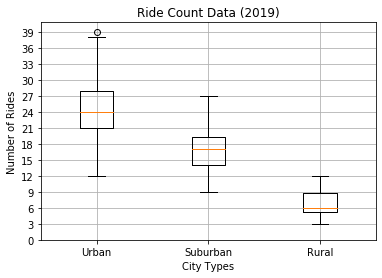

In [55]:
# the same plot with Matlab style

xlabels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count,suburban_ride_count, rural_ride_count]

plt.boxplot(ride_count_data, labels = xlabels)

plt.title("Ride Count Data (2019)")
plt.xlabel("City Types")
plt.ylabel("Number of Rides")
plt.yticks(np.arange(0, 41, step=3.0))
plt.grid()
plt.show()

In [56]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [57]:
# Get the city that matches 39.
# we take data series urban_ride_count that has only City name and count, we search for city name with count == 39
#we defie new variable urban_city_outlier wthich is the result of the search

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


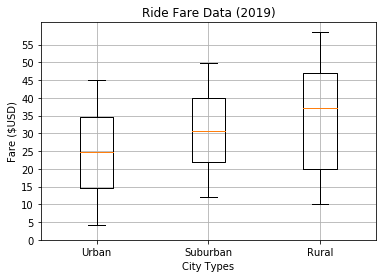

In [58]:
#combined box plot of fate ride data

xlabels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares,suburban_fares, rural_fares]

plt.boxplot(ride_fare_data, labels = xlabels)

plt.title("Ride Fare Data (2019)")
plt.xlabel("City Types")
plt.ylabel("Fare ($USD)")
plt.yticks(np.arange(0, 60, step=5.0))
plt.grid()
plt.savefig("analysis\Fig3.png")
plt.show()


In [59]:
print(f"Urban: \n {urban_fares.describe()} \n")
print(f"Suburban: \n {suburban_fares.describe()} \n")
print(f"Rural: \n {rural_fares.describe()} \n")

Urban: 
 count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64 

Suburban: 
 count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64 

Rural: 
 count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64 



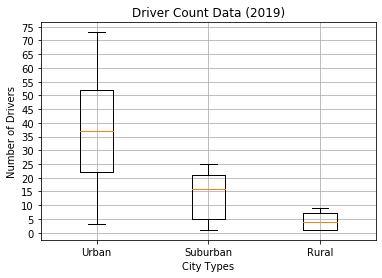

In [60]:
xlabels = ["Urban", "Suburban", "Rural"]
drivers_data = [urban_drivers,suburban_drivers, rural_drivers]

plt.boxplot(drivers_data, labels = xlabels)

plt.title("Driver Count Data (2019)")
plt.xlabel("City Types")
plt.ylabel("Number of Drivers")
plt.yticks(np.arange(0, 80, step=5.0))
plt.grid()
plt.savefig("analysis\Fig4.png")
plt.show()

In [61]:
fares_sum_by_type = pyber_data_df.groupby("type").sum()["fare"]
fares_sum_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [62]:
fares_total = pyber_data_df.sum()["fare"]
fares_total

63538.64000000014

In [63]:
#fare percentage per type
#type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
fare_type_percents = (fares_sum_by_type/fares_total)*100
fare_type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

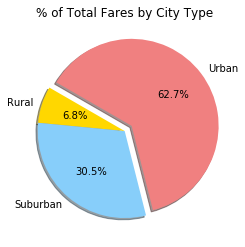

In [64]:
#percentage values on hte pie chart we get by putting " autopct='%1.1f%%'  "

plt.pie(fare_type_percents, labels = ["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"],
                                explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14

plt.show()

In [65]:
rides_total = pyber_data_df.count()["ride_id"]
rides_total

2375

In [66]:
rides_count_per_type = pyber_data_df.groupby("type").count()["fare"]
rides_count_per_type

type
Rural        125
Suburban     625
Urban       1625
Name: fare, dtype: int64

In [67]:
ride_type_percents = (rides_count_per_type/rides_total)*100
ride_type_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: fare, dtype: float64

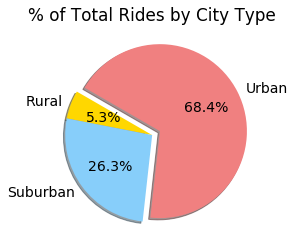

In [68]:
#percentage values on hte pie chart we get by putting " autopct='%1.1f%%'  "

plt.pie(ride_type_percents, labels = ["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"],
                                explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis\Fig5.png")
plt.show()

In [69]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [70]:
number_drivers_total = pyber_data_df.sum()["driver_count"]
number_drivers_total

68709

In [71]:
drivers_sum_per_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
drivers_sum_per_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [72]:
driver_type_percent = (drivers_sum_per_type/number_drivers_total)*100
driver_type_percent

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

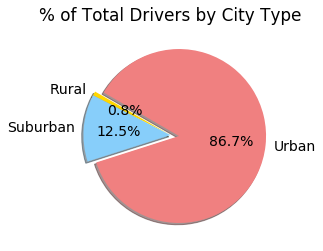

In [73]:
#percentage values on hte pie chart we get by putting " autopct='%1.1f%%'  "

plt.pie(driver_type_percent, labels = ["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"],
                                explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis\Fig6.png")
plt.show()

In [74]:
#MODULE Challenge I
#calcualting average fare per city type
average_fare_type = fares_sum_by_type/rides_count_per_type
average_fare_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [75]:
#Challenge I
#Calcualting average fare per driver per city type
average_fare_driver_type = fares_sum_by_type/driver_count_city
average_fare_driver_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [76]:
#Challenge I
#calculating Total Fares per city type
fares_sum_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [77]:
#Challenge I
# calcilating Total Rides per city type
rides_count_per_type

type
Rural        125
Suburban     625
Urban       1625
Name: fare, dtype: int64

In [78]:
#Challenge I
#Creating summary Data Frame
summary_by_type_df = pd.DataFrame(
          {"Total Rides": rides_count_per_type,
          "Total Drivers": driver_count_city,
          "Total Fares": fares_sum_by_type,
           "Average Fare per Ride":average_fare_type,
           "Average Fare per Driver":average_fare_driver_type
          
          })

In [79]:
#Challenge II step 
#formating the data frame

summary_by_type_df["Total Rides"] = summary_by_type_df["Total Rides"].map("{:,.0f}".format)
summary_by_type_df["Total Fares"] = summary_by_type_df["Total Fares"].map("{:,.2f}".format)
summary_by_type_df["Average Fare per Ride"] = summary_by_type_df["Average Fare per Ride"].map("{:,.2f}".format)
summary_by_type_df["Average Fare per Driver"] = summary_by_type_df["Average Fare per Driver"].map("{:,.2f}".format)

#Remove the index name.
summary_by_type_df.index.name = None

In [80]:
# Display the DataFrame.
summary_by_type_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"4,327.93",34.62,55.49
Suburban,625,490,"19,356.33",30.97,39.50
Urban,"1,625",2405,"39,854.38",24.53,16.57


In [81]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [82]:
#Challenge II step 1
#renamig columns
pyber_data_df = pyber_data_df.rename(columns = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

In [83]:
#checking if dataframe looks ok
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [84]:
#Dropped step umber 2, for refinement of the code

#Changed order of steps 3,4,5 to 3,5,4 


#Challenge II step 3
#copy old data frame w. only columns "Date", "City Type","Fare"
pyber_data_stripped_df = pyber_data_df[["Date", "City Type","Fare"]].copy()
pyber_data_stripped_df.head()



,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:03,Urban,23.44
4,2019-03-06 04:28:35,Urban,34.58


In [85]:
#Challenge II step 4
#setting datetime index
datetime_series = pd.to_datetime(pyber_data_stripped_df["Date"])
datetime_index = pd.DatetimeIndex(datetime_series.values)

In [86]:
pyber_data_stripped_df=pyber_data_stripped_df.set_index(datetime_index)
pyber_data_stripped_df.head()

,Date,City Type,Fare
2019-01-14 10:14:22,2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,2019-03-06 04:28:35,Urban,34.58


In [87]:
##Challenge II step 5
#Dropping extra date column
pyber_data_stripped_df.drop("Date",axis=1,inplace=True)
pyber_data_stripped_df.head()

,City Type,Fare
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [88]:
#Challenge II step 6
#confirmend date time as index

pyber_data_stripped_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [89]:
#Challenge II step 7
#Calculating Fares based on City TYpe

pyber_data_stripped_df.groupby(["City Type"]).sum()["Fare"]

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [90]:
#Challenge II step 8
#Reset inex
pyber_data_stripped_df = pyber_data_stripped_df.reset_index()
pyber_data_stripped_df

,index,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:03,Urban,23.44
4,2019-03-06 04:28:35,Urban,34.58
...,...,...,...
2370,2019-04-29 17:04:39,Rural,13.38
2371,2019-01-30 00:05:47,Rural,20.76
2372,2019-02-10 21:03:50,Rural,11.11
2373,2019-05-07 19:22:15,Rural,44.94


In [91]:
#Challenge II step 9
#Creating Pivot table
pivot_pyber_data_str_df = pyber_data_stripped_df.pivot(index = 'index',columns = 'City Type', values= "Fare")
pivot_pyber_data_str_df

City Type,Rural,Suburban,Urban
index,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [92]:
##Challenge II step 9
#Changing name of index axis in pivot from "index" to Date
pivot_pyber_data_str_df= pivot_pyber_data_str_df.rename_axis(index = {'index': 'Date'})
pivot_pyber_data_str_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [93]:
#Challenge II step 10
#Create a data frame sliced for dates '2019-01-01':'2019-04-28'
slice_pivot_pyber_data= pivot_pyber_data_str_df.loc['2019-01-01':'2019-04-28']

In [94]:
#Grouping data by weeks
slice_pivot_pyber_data = slice_pivot_pyber_data.resample("W").sum()
slice_pivot_pyber_data

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


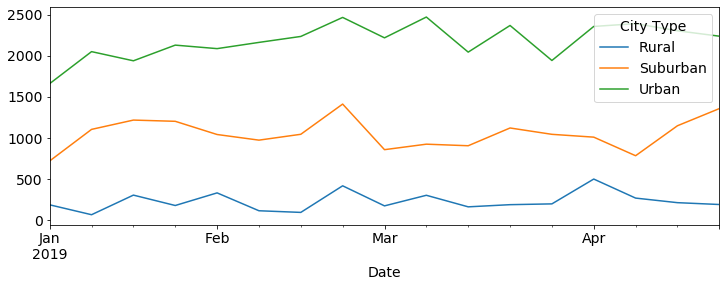

In [95]:
#quick check if plot is correct
slice_pivot_pyber_data.plot(figsize=(12,4))

In [96]:
#importing ploting style
import matplotlib.style as style

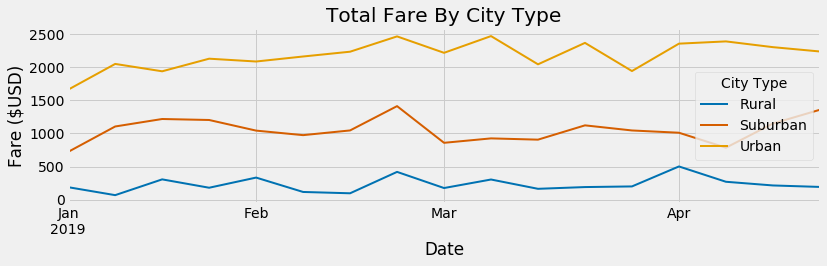

In [97]:
#implementing fivethirtyeight stile
style.use('fivethirtyeight')

#to make sure color blind friendly colors
colors = [[0,114/255,178/255], [213/255,94/255,0], [230/255,159/255,0]] 

#plotting
ax = slice_pivot_pyber_data.plot(kind = "line", lw=2, markersize=50, title='Total Fare By City Type', figsize = (12,3), grid = True, color = colors)
ax.set_xlabel("Date")
ax.set_ylabel("Fare ($USD)")
plt.savefig("analysis\Fig7.png")
